## Task 
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### Dataset 
Twitter Sentiment Analysis

### Overveiw 
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

#### 1.Importing Necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv('twitter_training.csv', names = cols)

#### 2.Informatioin about Dataframe

In [4]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train.shape

(75682, 4)

In [6]:
train.info

<bound method DataFrame.info of          ID                Topic   Sentiment  \
0      2401          Borderlands    Positive   
1      2401          Borderlands    Positive   
2      2401          Borderlands    Positive   
3      2401          Borderlands    Positive   
4      2401          Borderlands    Positive   
...     ...                  ...         ...   
75677  4891  GrandTheftAuto(GTA)  Irrelevant   
75678  4359                CS-GO  Irrelevant   
75679  2652          Borderlands    Positive   
75680  8069            Microsoft    Positive   
75681  6960      johnson&johnson     Neutral   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                  

In [7]:
train.describe(include=object)

,Topic,Sentiment,Text
count,75682,75682,74996
unique,32,4,69972
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [8]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

#### 3.Checking for null/missing values

In [9]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [10]:
train.dropna(inplace=True)

#### 4.Checking for duplicate values

In [11]:
train.duplicated().sum()

np.int64(2858)

In [12]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

np.int64(0)

#### 5.Visualization of count different topics

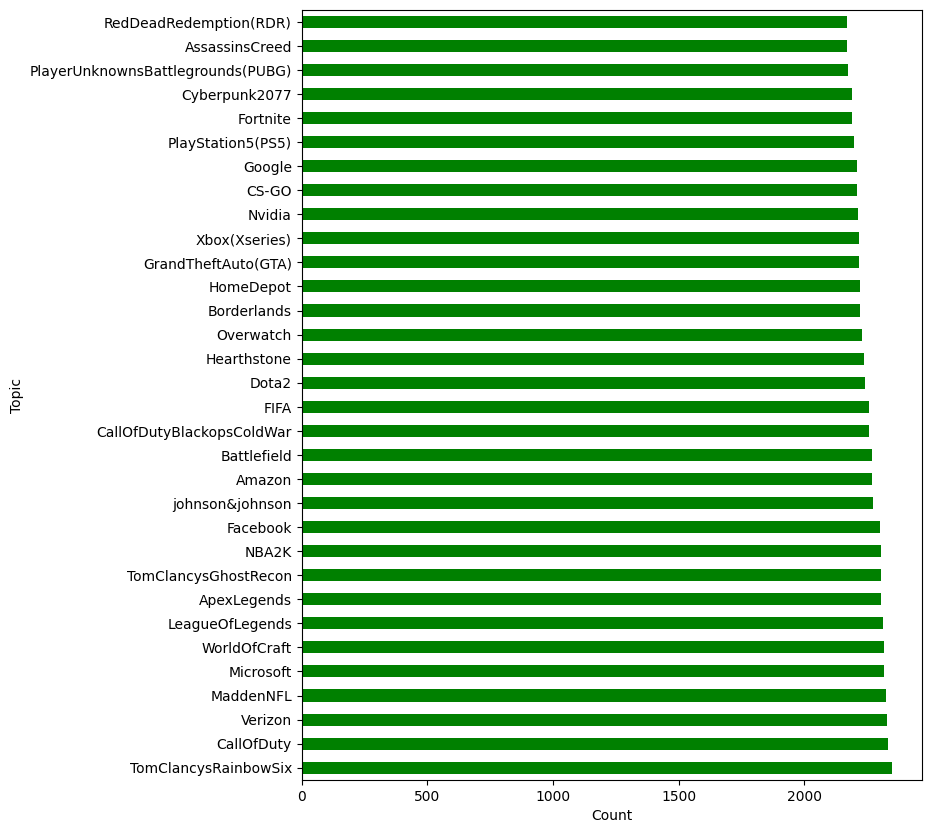

In [13]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.show()

#### 6.Sentiment Distribution

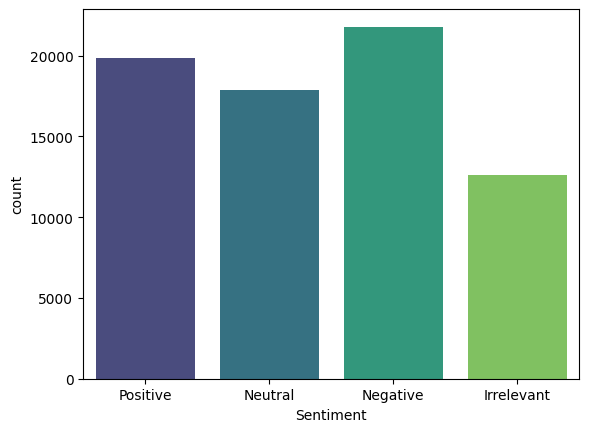

In [14]:
sns.countplot(x='Sentiment',hue = 'Sentiment', data=train, palette='viridis')
plt.show()

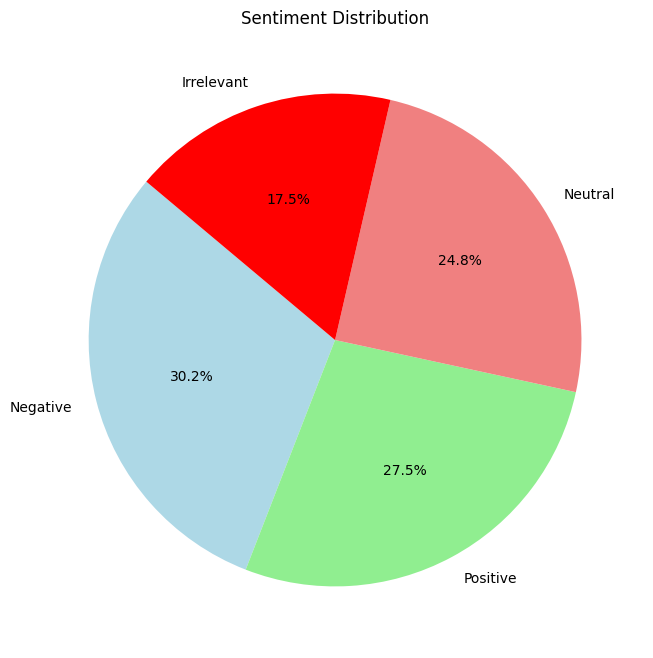

In [15]:
# Calculate the count of each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral','red'])

plt.title('Sentiment Distribution')
plt.show()

Observation:
            Most topic has negative sentiment.

In [16]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
75673,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


#### 7. Sentiment Distribution topic wise

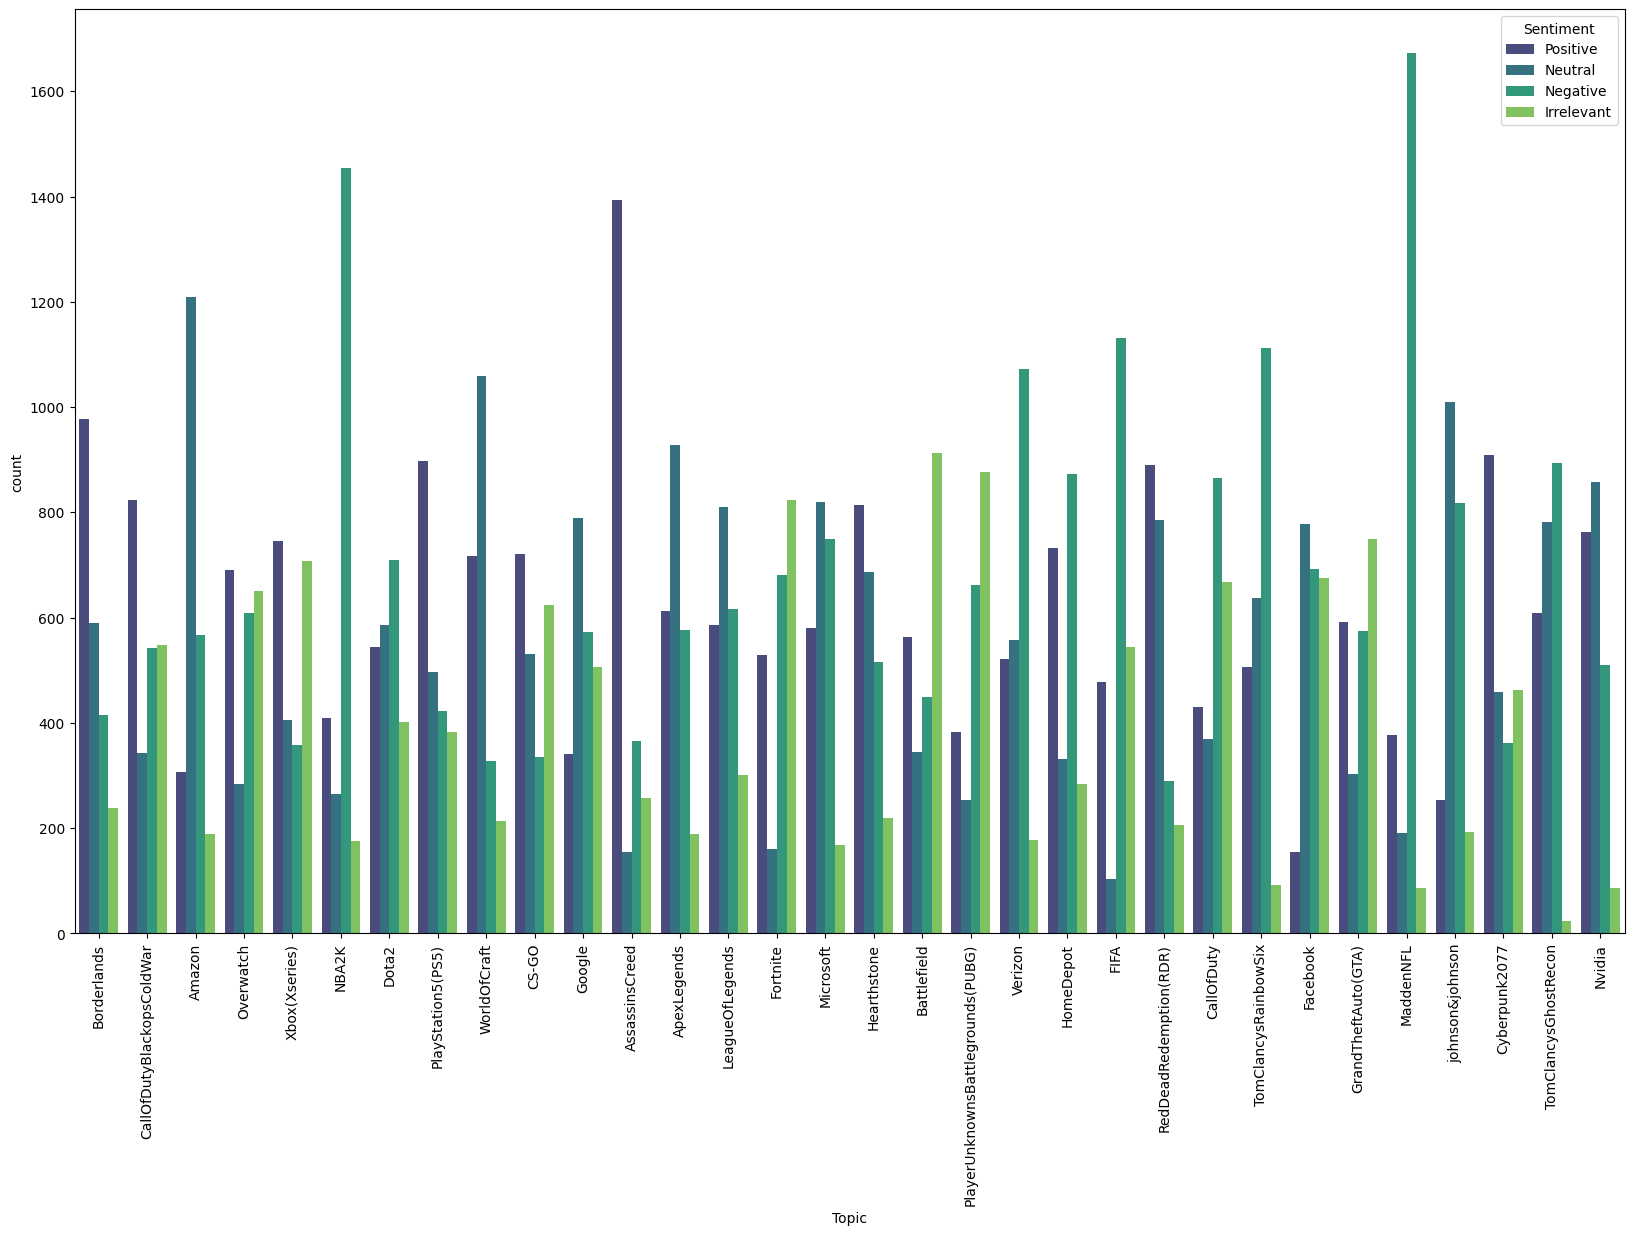

In [17]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [18]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

#### 8. Top 5 Topics with Negative Sentiments


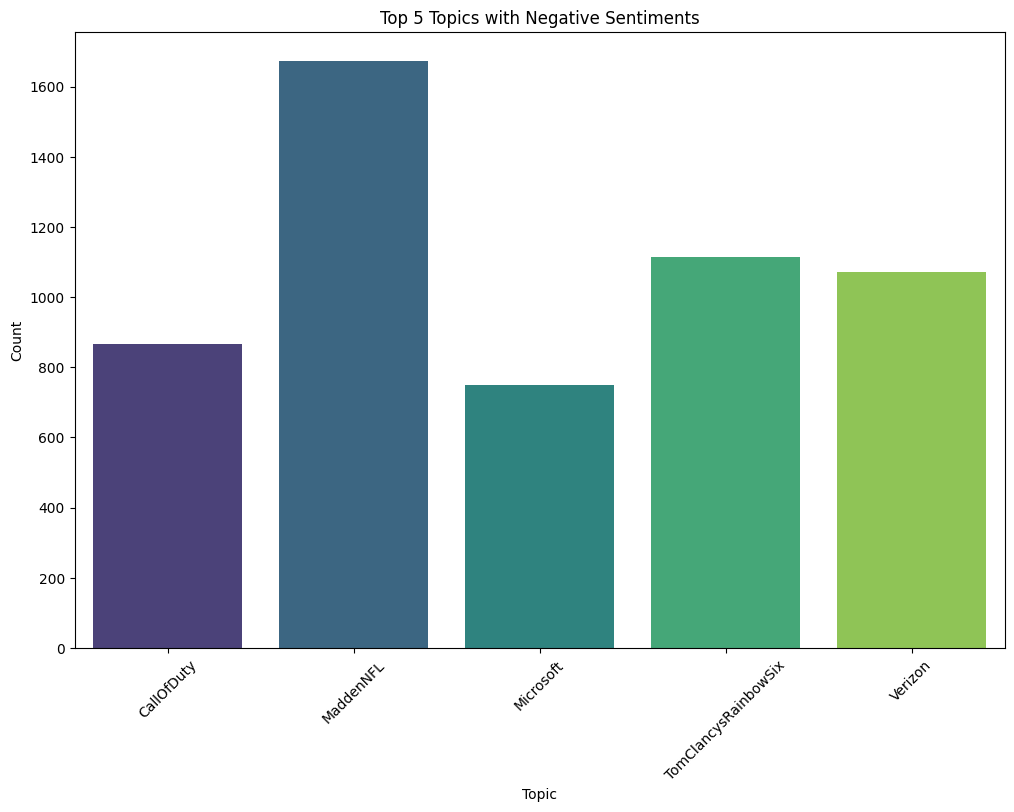

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', hue='Topic', palette='viridis', legend=False)
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 9. Top 5 Topics with positive sentiment

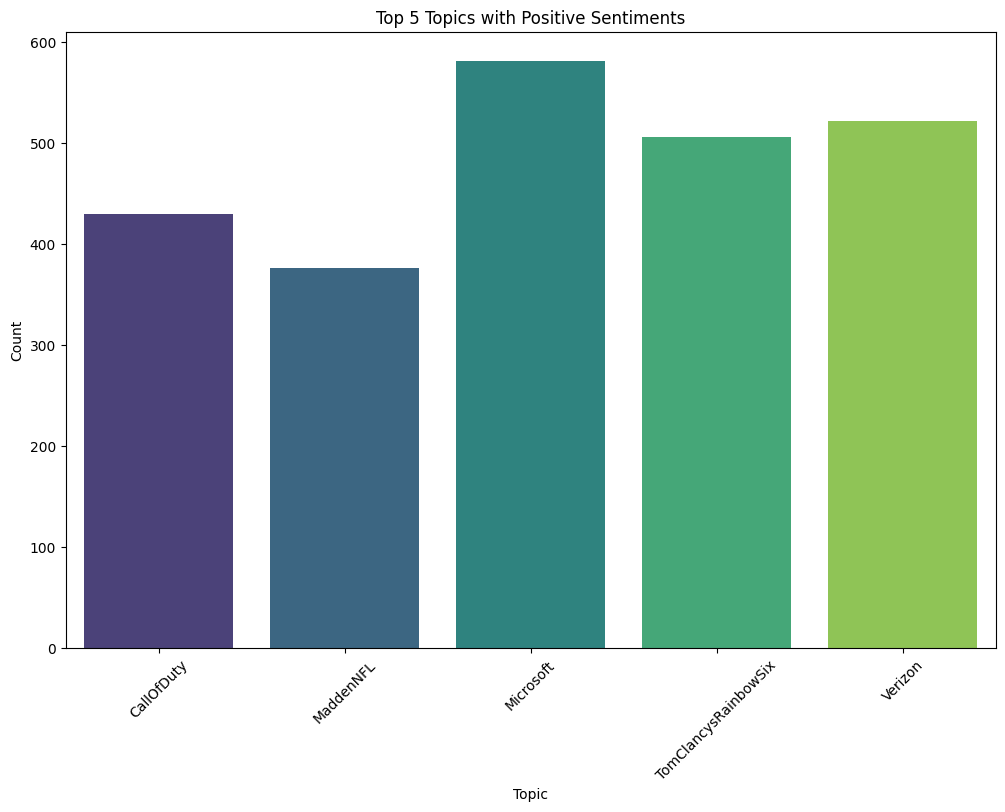

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue = 'Topic', palette='viridis', legend=False)
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 10. Top 5 topics with Neutral Sentiments

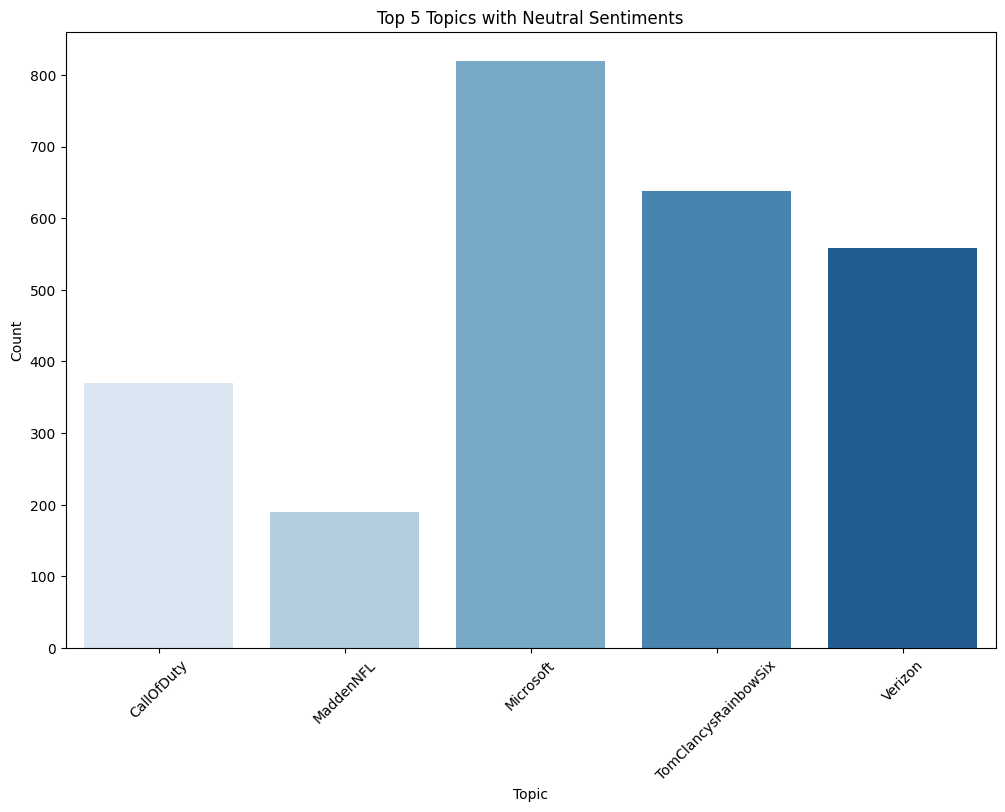

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count',hue = 'Topic', palette='Blues', legend = False)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 11. Topic 5 topics with Irrelevant Sentiments

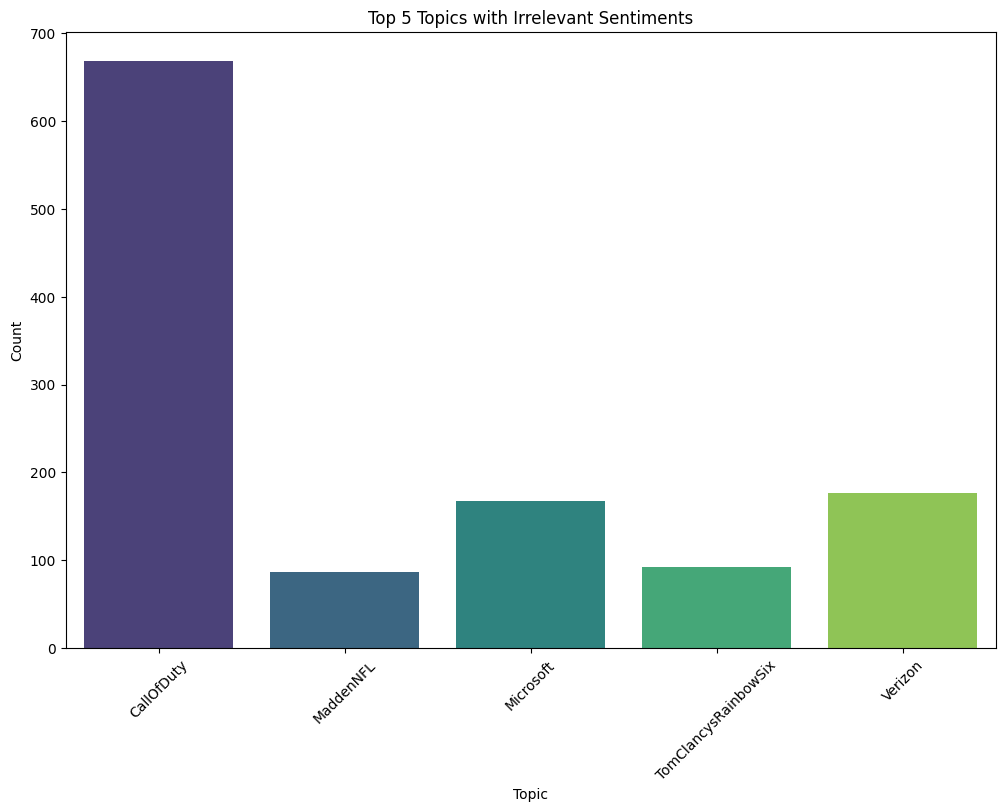

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue = 'Topic', palette='viridis', legend = False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 12. Sentiment Distribution in Google

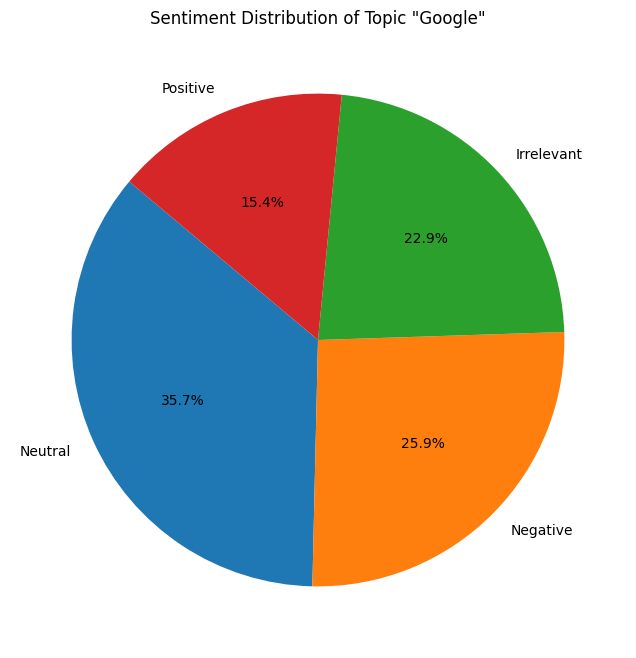

In [23]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

#### 13. Sentiment Distribution in Microsoft

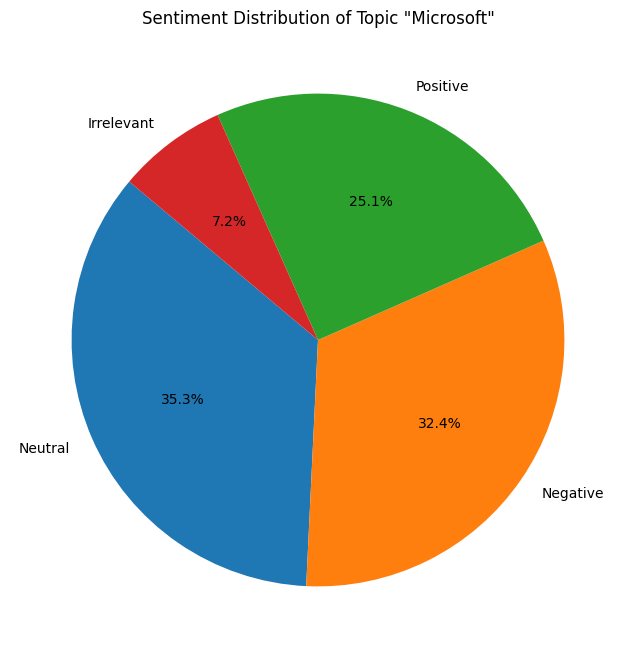

In [24]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [25]:
train['msg_len'] = train['Text'].apply(len)

train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,109
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,169
75673,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,197
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,281


#### 14.Plot of message length distribution for training data

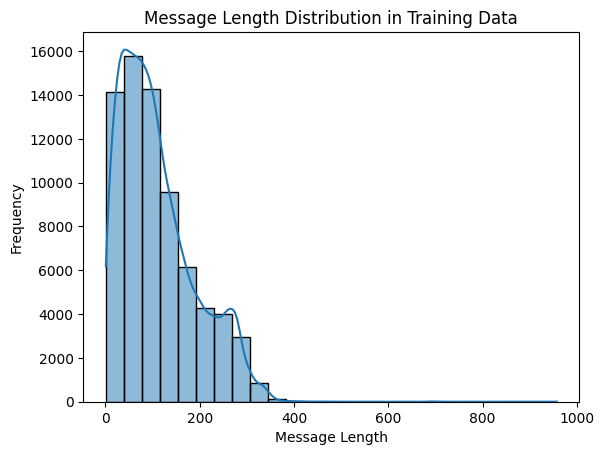

In [26]:

sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

#### 15. Plot message length distrbution by sentiment for training data

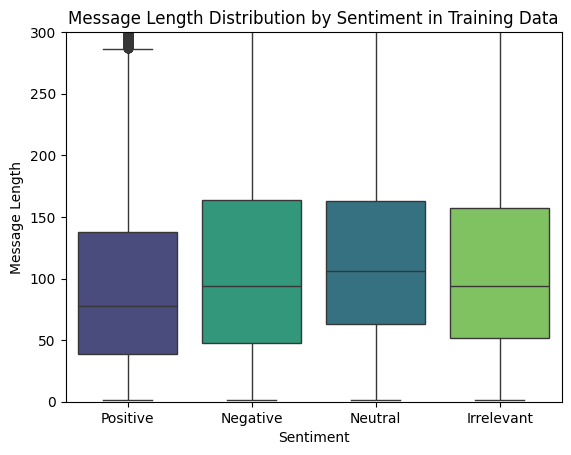

In [27]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len',hue = train['Sentiment'], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], legend=False)
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show() 

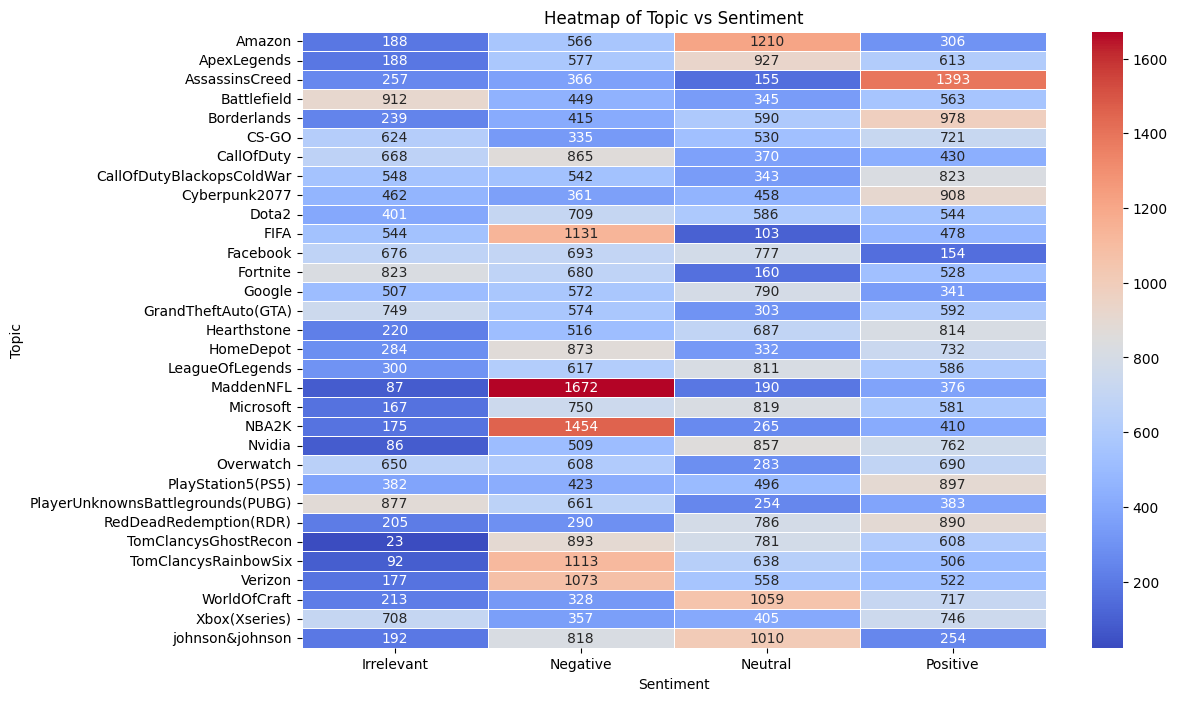

In [28]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

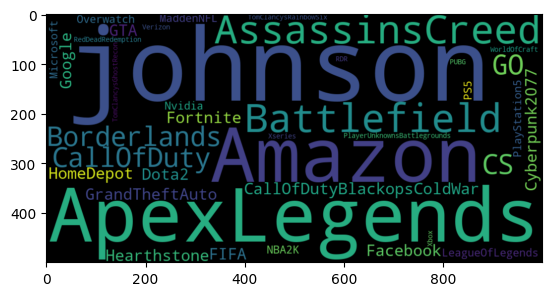

In [29]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

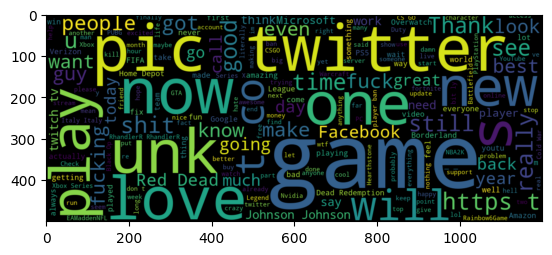

In [30]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

### Adding NLP and Machine Learning

#### 16. Text Preprocessing(NLP)

In [33]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nanhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Clean the tweet text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)   # remove URLs
    text = re.sub(r'\@\w+|\#','', text)                                       # remove mentions & hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))          # remove punctuation
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
train['Clean_Text'] = train['Text'].apply(clean_text)

print("✅ Text Cleaning Completed")
train[['Text', 'Clean_Text']].head()

✅ Text Cleaning Completed


,Text,Clean_Text
0,im getting on borderlands and i will murder yo...,im get borderland murder
1,I am coming to the borders and I will kill you...,come border kill
2,im getting on borderlands and i will kill you ...,im get borderland kill
3,im coming on borderlands and i will murder you...,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,im get borderland 2 murder


#### 17. Feature Extraction (Convert text to numbers)

In [37]:
vectorizer = TfidfVectorizer(max_features=3000)   # also reduce features
X = vectorizer.fit_transform(train['Clean_Text']) # keep sparse matrix
y = train['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ TF-IDF vectorization successful")
print("Matrix type:", type(X_train))

✅ TF-IDF vectorization successful
Matrix type: <class 'scipy.sparse._csr.csr_matrix'>


#### 18. Model Training


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#### 19. Model Evaluation

Accuracy: 0.6377183254782368

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.62      0.47      0.53      2503
    Negative       0.69      0.73      0.71      4393
     Neutral       0.58      0.60      0.59      3542
    Positive       0.64      0.67      0.66      3990

    accuracy                           0.64     14428
   macro avg       0.63      0.62      0.62     14428
weighted avg       0.64      0.64      0.63     14428



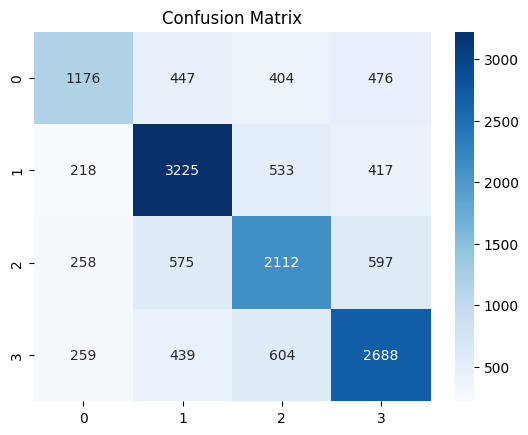

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


#### to predict new tweets

In [40]:
sample = ["I love this product!", "This is terrible.", "Not bad, could be better."]
sample_clean = [clean_text(s) for s in sample]
sample_vec = vectorizer.transform(sample_clean)
print(model.predict(sample_vec))


['Positive' 'Negative' 'Negative']
